In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("../data/summaries.json").T
data.columns

Index(['date', 'weekday', 'postings', 'new_postings', 'new_companies'], dtype='object')

1394.4473684210527

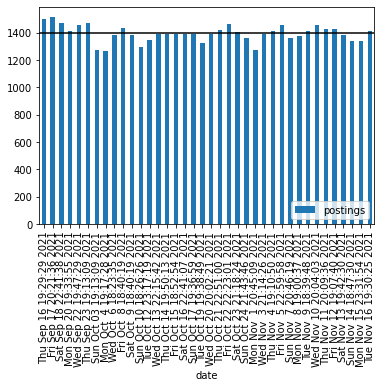

In [3]:
(
    data
    [['date', 'postings']]
    .dropna()
    .plot.bar('date', 'postings')
    .legend(loc='lower right')
)
plt.hlines(data.postings.mean(), -10, 1000, "black")
data.postings.mean()

In [4]:
data.postings.dropna().diff()

2021-09-16     NaN
2021-09-17      15
2021-09-18     -41
2021-09-20     -62
2021-09-22      46
2021-09-23      16
2021-03-10    -199
2021-04-10      -8
2021-06-10     117
2021-08-10      48
2021-09-10     -48
2021-10-10     -90
2021-12-10      50
2021-10-13      45
2021-10-14       4
2021-10-15      -1
2021-10-16      -4
2021-10-17       4
2021-10-19     -67
2021-10-20      62
2021-10-21      31
2021-10-22      42
2021-10-23     -52
2021-10-24     -47
2021-01-11     -90
2021-03-11     116
Name: postings, dtype: object